In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
y2015 = pd.read_csv('https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',skipinitialspace=True, header=1)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', 500)
y2015.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,Bookkeeper/Accounting,10+ years,MORTGAGE,48000.0,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,297xx,SC,33.18,0.0,Jun-1991,0.0,33.0,2.0,11.0,2.0,19108.0,29.6%,19.0,w,13668.88,13668.88,4519.68,4519.68,2331.12,2188.56,0.0,0.0,0.0,Jan-2017,379.39,Jan-2017,Jan-2017,0.0,33.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,31329.0,1.0,2.0,1.0,2.0,6.0,12221.0,91.0,1.0,4.0,14982.0,65.0,284700.0,0.0,0.0,1.0,6.0,2848.0,263953.0,17.6,0.0,0.0,131.0,294.0,11.0,6.0,2.0,11.0,76.0,11.0,76.0,2.0,6.0,9.0,6.0,8.0,6.0,9.0,11.0,9.0,11.0,0.0,0.0,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,tech,8 years,MORTGAGE,60000.0,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,299xx,SC,22.44,0.0,Jun-1996,0.0,NaN,NaN,7.0,0.0,7722.0,59.4%,9.0,w,6635.69,6635.69,3572.97,3572.97,2964.31,608.66,0.0,0.0,0.0,Jan-2017,298.58,Jan-2017,Jan-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,55387.0,0.0,3.0,0.0,0.0,47.0,47665.0,43.0,2.0,2.0,4744.0,50.0,13000.0,0.0,0.0,2.0,2.0,7912.0,4778.0,61.8,0.0,0.0,234.0,91.0,9.0,9.0,0.0,11.0,NaN,9.0,NaN,0.0,3.0,3.0,3.0,3.0,5.0,4.0,4.0,3.0,7.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,Sales Manager,10+ years,MORTGAGE,109000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,226xx,VA,26.02,0.0,Dec-2001,1.0,NaN,NaN,9.0,0.0,20862.0,54.3%,19.0,w,0.00,0.00,26224.23,26224.23,25000.00,1224.23,0.0,0.0,0.0,Sep-2016,20807.39,NaN,Jan-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400.0,1.0,0.0,1.0,2.0,33976.0,17538.0,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,Senior Manager,10+ years,MORTGAGE,92000.0,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,275xx,NC,21.60,0.0,May-1984,0.0,42.0,NaN,16.0,0.0,51507.0,6

In [4]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [5]:
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [6]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,60 months,14.85,379.39,C,10+ years,MORTGAGE,48000.0,Not Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,33.18,0.0,0.0,33.0,2.0,11.0,2.0,19108.0,19.0,w,13668.88,13668.88,4519.68,4519.68,2331.12,2188.56,0.0,0.0,0.0,Jan-2017,379.39,Jan-2017,Jan-2017,0.0,33.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,31329.0,1.0,2.0,1.0,2.0,6.0,12221.0,91.0,1.0,4.0,14982.0,65.0,284700.0,0.0,0.0,1.0,6.0,2848.0,263953.0,17.6,0.0,0.0,131.0,294.0,11.0,6.0,2.0,11.0,76.0,11.0,76.0,2.0,6.0,9.0,6.0,8.0,6.0,9.0,11.0,9.0,11.0,0.0,0.0,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,36 months,7.49,298.58,A,8 years,MORTGAGE,60000.0,Not Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,22.44,0.0,0.0,NaN,NaN,7.0,0.0,7722.0,9.0,w,6635.69,6635.69,3572.97,3572.97,2964.31,608.66,0.0,0.0,0.0,Jan-2017,298.58,Jan-2017,Jan-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,55387.0,0.0,3.0,0.0,0.0,47.0,47665.0,43.0,2.0,2.0,4744.0,50.0,13000.0,0.0,0.0,2.0,2.0,7912.0,4778.0,61.8,0.0,0.0,234.0,91.0,9.0,9.0,0.0,11.0,NaN,9.0,NaN,0.0,3.0,3.0,3.0,3.0,5.0,4.0,4.0,3.0,7.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,36 months,7.49,777.55,A,10+ years,MORTGAGE,109000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,26.02,0.0,1.0,NaN,NaN,9.0,0.0,20862.0,19.0,w,0.00,0.00,26224.23,26224.23,25000.00,1224.23,0.0,0.0,0.0,Sep-2016,20807.39,NaN,Jan-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,305781.0,0.0,3.0,0.0,1.0,13.0,47194.0,58.0,0.0,1.0,8937.0,57.0,38400.0,1.0,0.0,1.0,2.0,33976.0,17538.0,54.3,0.0,0.0,142.0,168.0,13.0,13.0,3.0,13.0,NaN,0.0,NaN,0.0,3.0,3.0,5.0,6.0,7.0,5.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,36 months,6.49,858.05,A,10+ years,MORTGAGE,92000.0,Not Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,21.60,0.0,0.0,42.0,NaN,16.0,0.0,51507.0,24.0,w,19263.77,19263.77,10271.36,10271.36,8736.23,1535.13,0.0,0.0,0.0,Jan-2017,858.05,Jan-2017,Jan-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221110.0,0.0,2.0,0.0,0.0,27.0,23413.0,55.0,0.0,1.0,8752.0,61.0,79900.0,0.0,1.0,0.0,1.0,13819.0,16623.0,59.9,0.0,0.0,82.0,379.0,19.0,19.0,2.0,19.0,48.0,NaN,42.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,18.0,9.0,16.0,0.0,0.0,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092.0,73384866.0,8650.

In [7]:
y2015 = y2015[:-2]

In [8]:
pd.get_dummies(y2015)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,issue_d_Apr-2015,issue_d_Aug-2015,issue_d_Dec-2015,issue_d_Feb-2015,issue_d_Jan-2015,issue_d_Jul-2015,issue_d_Jun-2015,issue_d_Mar-2015,issue_d_May-2015,issue_d_Nov-2015,issue_d_Oct-2015,issue_d_Sep-2015,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,title_Business,title_Car financing,title_Credit Card/Auto Repair,title_Credit card refinancing,title_Debt consolidation,title_DebtC,title_Green loan,title_Home buying,title_Home improvement,title_Learning and training,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_New Baby and New House (CC Consolidate),title_Other,title_Pay off Lowes Card,title_Paying off higher interest cards & auto,title_Prescription Drug and Medical Costs,title_SAVE,title_Simple Loan Until Contract Is Completed,title_Student Loan,title_Trying to come back to reality!,title_Vacation,title_considerate,title_new day,title_new kitchen for momma!,title_odymeds,initial_list_status_f,initial_list_status_w,last_pymnt_d_Apr-2015,last_pymnt_d_Apr-2016,last_pymnt_d_Aug-2015,last_pymnt_d_Aug-2016,last_pymnt_d_Dec-2015,last_pymnt_d_Dec-2016,last_pymnt_d_Feb-2015,last_pymnt_d_Feb-2016,last_pymnt_d_Jan-2015,last_pymnt_d_Jan-2016,last_pymnt_d_Jan-2017,last_pymnt_d_Jul-2015,last_pymnt_d_Jul-2016,last_pymnt_d_Jun-2015,last_pymnt_d_Jun-2016,last_pymnt_d_Mar-2015,last_pymnt_d_Mar-2016,last_pymnt_d_May-2015,last_pymnt_d_May-2016,last_pymnt_d_Nov-2015,last_pymnt_d_Nov-2016,last_pymnt_d_Oct-2015,last_pymnt_d_Oct-2016,last_pymnt_d_Sep-2015,last_pymnt_d_Sep-2016,next_pymnt_d_Feb-2017,next_pymnt_d_Jan-2017,next_pymnt_d_Jul-2016,next_pymnt_d_Mar-2017,last_credit_pull_d_Apr-2015,last_credit_pull_d_Apr-2016,last_credit_pull_d_Aug-2015,last_credit_pull_d_Aug-2016,last_credit_pull_d_Dec-2014,last_credit_pull_d_Dec-2015,last_credit_pull_d_Dec-2016,last_credit_pull_d_Feb-2015

In [9]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status',1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc,X,Y,cv=10)

array([0.97972026, 0.98005272, 0.98154876, 0.98133504, 0.97029209,
       0.97810496, 0.96957895, 0.98062172, 0.97976583, 0.9802166 ])

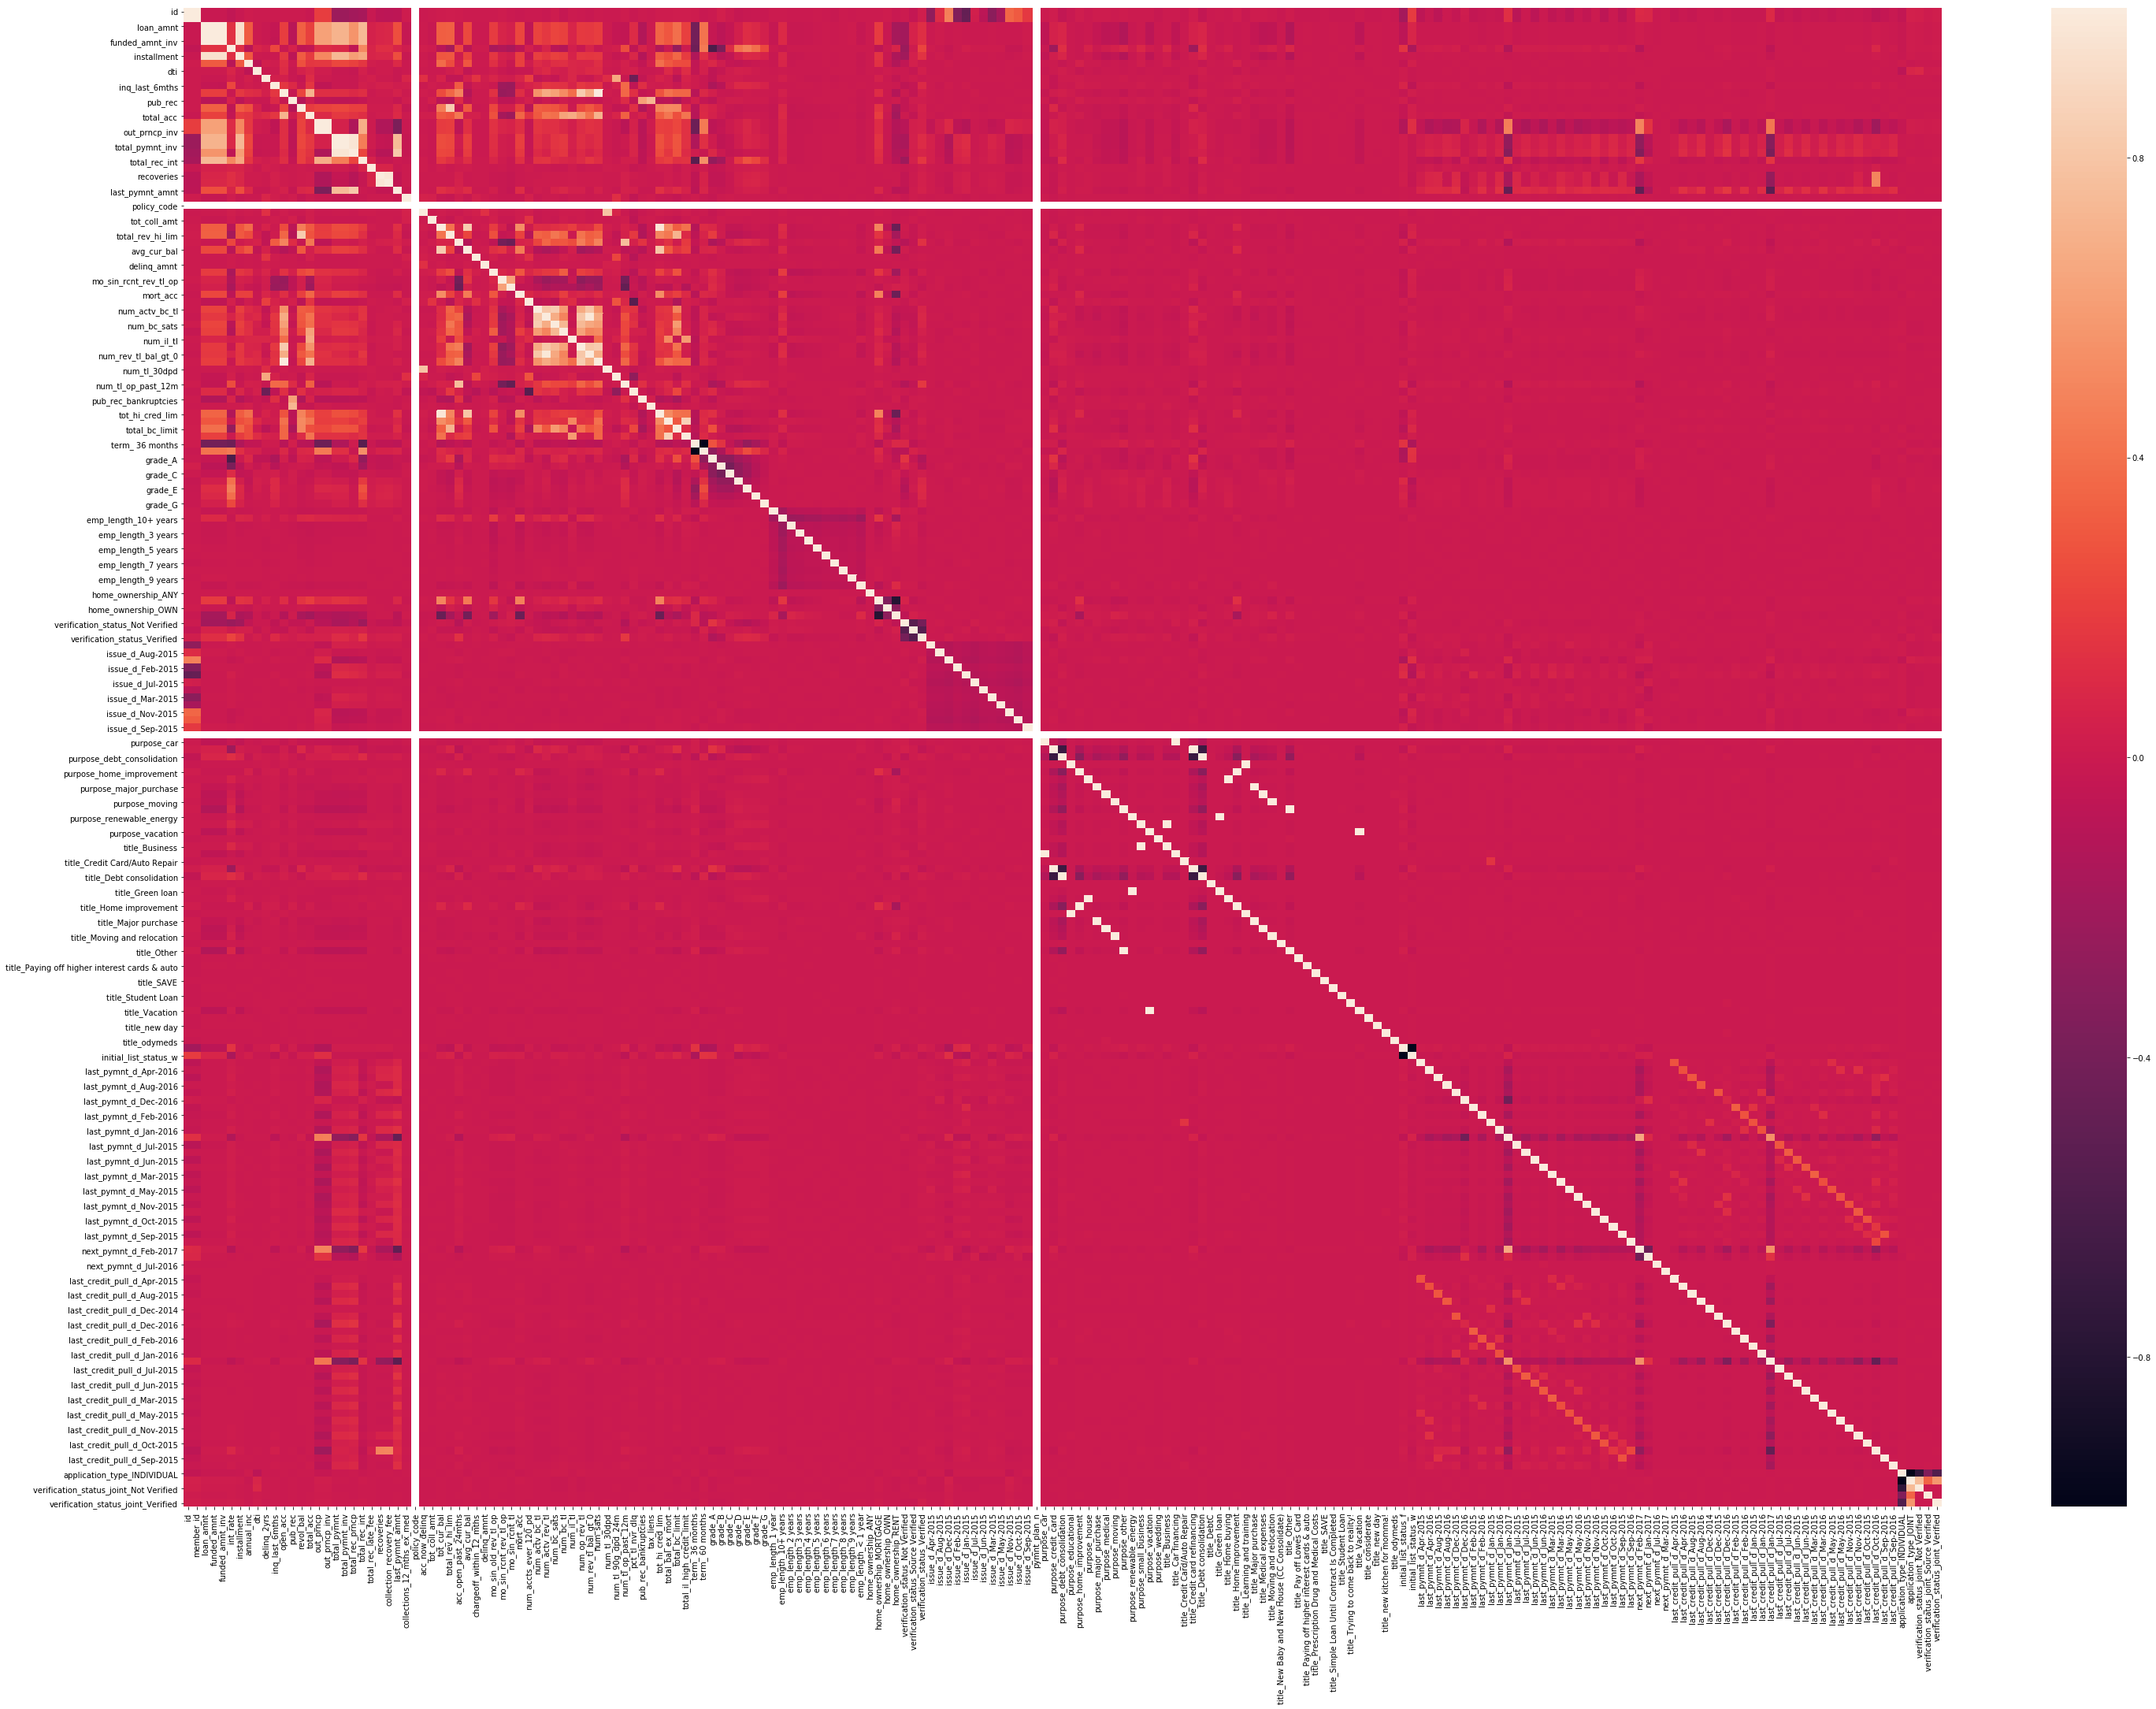

In [10]:
import seaborn as sns
corr = X.corr()
plt.figure(figsize=(50,35))
sns.heatmap(corr)

In [11]:
X3 = X.iloc[:,2:60]
X3

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,term_ 36 months,term_ 60 months
0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,0.0,11.0,2.0,19108.0,19.0,13668.88,13668.88,4519.680000,4519.68,2331.12,2188.56,0.0,0.00,0.0000,379.39,0.0,1.0,0.0,0.0,31329.0,284700.0,6.0,2848.0,0.0,0.0,294.0,11.0,6.0,2.0,2.0,6.0,9.0,6.0,8.0,6.0,9.0,9.0,11.0,0.0,0.0,2.0,78.9,0.0,2.0,298100.0,31329.0,281300.0,13400.0,0,1
1,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,0.0,7.0,0.0,7722.0,9.0,6635.69,6635.69,3572.970000,3572.97,2964.31,608.66,0.0,0.00,0.0000,298.58,0.0,1.0,0.0,0.0,55387.0,13000.0,2.0,7912.0,0.0,0.0,91.0,9.0,9.0,0.0,0.0,3.0,3.0,3.0,3.0,5.0,4.0,3.0,7.0,0.0,0.0,2.0,100.0,0.0,0.0,88635.0,55387.0,12500.0,75635.0,1,0
2,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,1.0,9.0,0.0,20862.0,19.0,0.00,0.00,26224.230000,26224.23,25000.00,1224.23,0.0,0.00,0.0000,20807.39,0.0,1.0,0.0,0.0,305781.0,38400.0,2.0,33976.0,0.0,0.0,168.0,13.0,13.0,3.0,0.0,3.0,3.0,5.0,6.0,7.0,5.0,3.0,9.0,0.0,0.0,0.0,100.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0,1,0
3,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,0.0,16.0,0.0,51507.0,24.0,19263.77,19263.77,10271.360000,10271.36,8736.23,1535.13,0.0,0.00,0.0000,858.05,0.0,1.0,0.0,0.0,221110.0,79900.0,1.0,13819.0,0.0,0.0,379.0,19.0,19.0,2.0,0.0,7.0,9.0,9.0,11.0,4.0,13.0,9.0,16.0,0.0,0.0,0.0,91.7,0.0,0.0,304003.0,74920.0,41500.0,42503.0,1,0
4,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,4.0,18.0,1.0,9568.0,19.0,0.00,0.00,9190.490000,9190.49,8650.00,540.49,0.0,0.00,0.0000,8251.42,0.0,1.0,0.0,0.0,18926.0,20750.0,17.0,1051.0,0.0,0.0,95.0,0.0,0.0,0.0,0.0,2.0,17.0,2.0,2.0,2.0,17.0,13.0,18.0,0.0,0.0,12.0,100.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0,1,0
5,23000.0,23000.0,23000.0,8.49,471.77,64000.0,18.28,0.0,0.0,21.0,0.0,24940.0,33.0,19143.69,19143.69,5634.120000,5634.12,3856.31,1777.81,0.0,0.00,0.0000,471.77,0.0,1.0,0.0,0.0,63886.0,47300.0,3.0,3549.0,0.0,0.0,171.0,8.0,8.0,0.0,0.0,6.0,8.0,7.0,8.0,14.0,14.0,8.0,21.0,0.0,0.0,2.0,87.9,0.0,0.0,93962.0,63886.0,39500.0,46662.0,0,1
6,29900.0,29900.0,29900.0,12.88,678.49,65000.0,21.77,0.0,0.0,15.0,0.0,31682.0,31.0,25346.66,25346.66,8120.480000,8120.48,4553.34,3567.14,0.0,0.00,0.0000,678.49,0.0,1.0,0.0,0.0,220251.0,67800.0,7.0,15732.0,0.0,0.0,139.0,5.0,5.0,2.0,0.0,2.0,5.0,4.0,9.0,8.0,13.0,5.0,15.0,0.0,0.0,4.0,100.0,0.0,0.0,271700.0,42497.0,34000.0,15574.0,0,1
7,18000.0,18000.0,18000.0,11.99,400.31,112000.0,8.68,0.0,0.0,17.0,0.0,10711.0,27.0,0.00,0.00,18387.220000,18387.22,18000.00,387.22,0.0,0.00,0.0000,18004.90,0.0,1.0,0.0,0.0,205067.0,82400.0,5.0,17089.0,0.0,0.0,265.0,1.0,1.0,4.0,0.0,5.0,6.0,12.0,12.0,6.0,15.0,6.0,16.0,0.0,0.0,4.0,100.0,0.0,0.0,309710.0,36127.0,69800.0,26210.0,0,1
8,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,0.0,13.0,0.0,7802.0,17.0,29900.89,29900.89,9886.610000,9886.61,5099.11,4787.50,0.0,0.00,0.0000,829.90,0.0,1.0,0.0,0.0,301500.0,67300.0,2.0,23192.0,0.0,0.0,87.0,2.0,2.0,1.0,0.0,4.0,5.0,8.0,10.0,2.0,10.0,5.0,13.0,0.0,0.0,1.0,100.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,0,1
9,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,3.0,12.0,0.0,21929.0,35.0,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.00,0.0000,10128.96,0.0,1.0,0.0,0.0,331730.0,34000.0,1

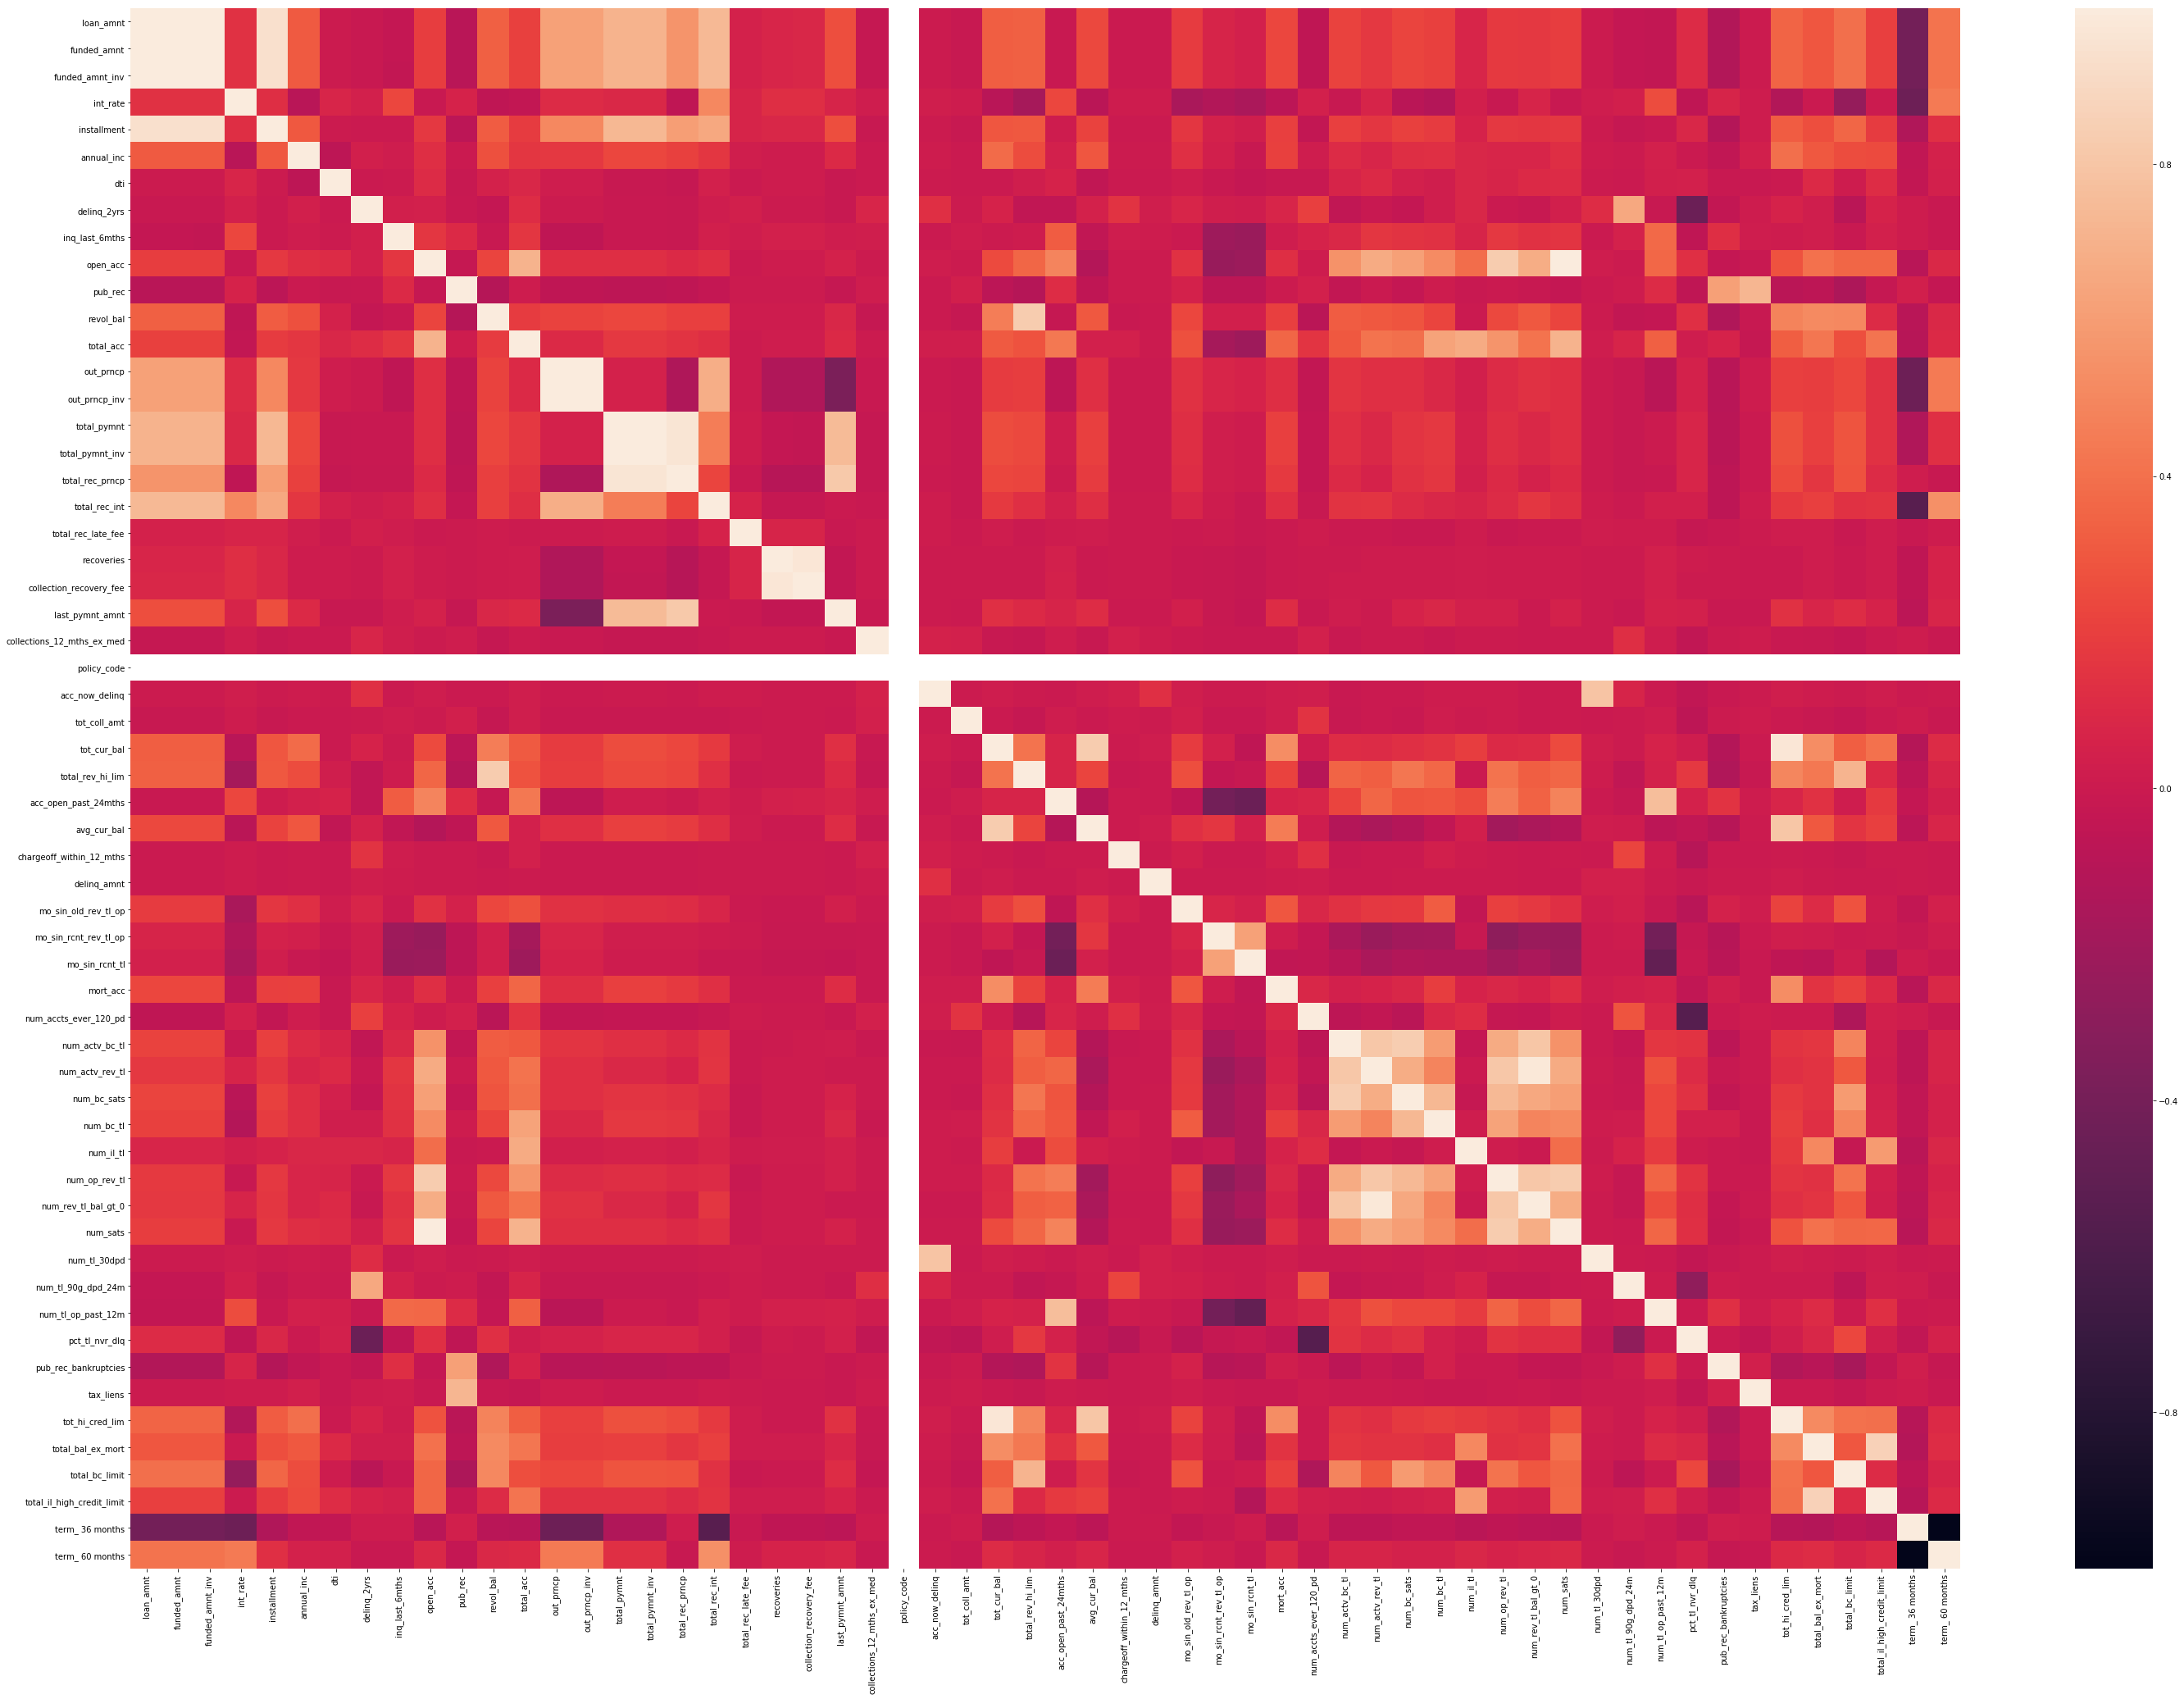

In [12]:
corr3 = X3.corr()
plt.figure(figsize=(50,35))
sns.heatmap(corr3)

In [13]:
from sklearn.decomposition import PCA 
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler

fit = StandardScaler().fit_transform(X3)

sklearn_pca = PCA(n_components = 12)
Y_sklearn = sklearn_pca.fit_transform(X3)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [8.37606571e-01 6.90023621e-02 4.37377268e-02 2.69753154e-02
 9.48273054e-03 4.38887310e-03 3.13668664e-03 2.04265645e-03
 1.50803251e-03 9.21991399e-04 7.86050980e-04 1.97307213e-04]


In [14]:
cross_val_score(rfc,Y_sklearn,Y,cv=10)

array([0.95452495, 0.95694712, 0.95661466, 0.95644843, 0.95651864,
       0.95663738, 0.95578142, 0.95613764, 0.95594557, 0.95038712])

I ran PCA on all the features of this data set after categorical variables were turned into continuous.  I limited my PCA to the features heavily correlated based on the heatmaps above. In the first heatmap there is a square in the upper right hand corner that shows significant correlation among the variables.  I decided to keep those 12 features.  